## Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%

Atributos: *Body Mass Max (g)*

Hipótesis alternativa: *Media Body Mass Max de Minnesotta = Media Body Mass Max global*

In [14]:
import pandas as pd
from scipy.stats import ttest_1samp

df_birds = pd.read_csv("Minnesota Birds.csv")
df_birds = df_birds.fillna(0)

alpha = 0.05

body_mass_max_global_mean = 634
body_mass_max_minnesota = df_birds['Body Mass Max (g)']

tscore, p = ttest_1samp(body_mass_max_minnesota, popmean=body_mass_max_global_mean)
print('tscore=%.2f, p=%.2f' % (tscore, p))

if p/2 > alpha:
    print("No se rechaza la hipótesis nula. Los pájaros de Minnesota no tienen igual masa corporal máxima media que los del resto del mundo")
elif p/2 <= alpha:
    print("Se rechaza la hipótesis nula. Los pájaros de Minnesota tienen igual masa corporal máxima media que los del resto del mundo")

tscore=0.40, p=0.69
No se rechaza la hipótesis nula. Los pájaros de Minnesota no tienen igual masa corporal máxima media que los del resto del mundo


## Exercici 2
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%

Atributos: *Family, Wingspan Min (cm)*
    
Hipótesis alternativa: *Media Wingspan Min de buitres > Media Wingspan Min de palomas*

tscore=9.10, p=0.00
Se rechaza la hipótesis nula. Los buitres tienen una envergadura de alas mínima media mayor que las palomas


<AxesSubplot:xlabel='Family', ylabel='Wingspan Min (cm)'>

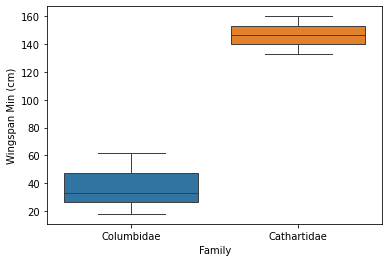

In [15]:
import seaborn as sns
from scipy.stats import ttest_ind

buitres = df_birds[df_birds['Family']=='Cathartidae']['Wingspan Min (cm)']
palomas = df_birds[df_birds['Family']=='Columbidae']['Wingspan Min (cm)']

tscore, p = ttest_ind(buitres, palomas)
print('tscore=%.2f, p=%.2f' % (tscore, p))
if p > alpha:
    print('No se rechaza la hipótesis nula. Los buitres no tienen una envergadura de alas mínima media mayor que las palomas ')
else:
    print('Se rechaza la hipótesis nula. Los buitres tienen una envergadura de alas mínima media mayor que las palomas')

df_birds_wingspan = df_birds[(df_birds['Family']=='Cathartidae') | (df_birds['Family']=='Columbidae')]
sns.boxplot(x='Family', y='Wingspan Min (cm)', data=df_birds_wingspan, linewidth=1)

Atributos: *Family, Body Mass Min (g)*

Hipótesis alternativa: *Media Body Mass Min varía entre los patos, los córvidos y las halcones*

tscore=1.54, p=0.22
No se rechaza la hipótesis nula. Patos, córvidos y halcones tienen masas corporales medias similares


<AxesSubplot:xlabel='Family', ylabel='Body Mass Min (g)'>

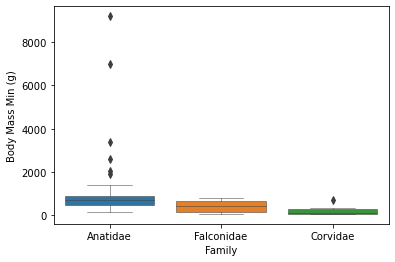

In [16]:
from scipy.stats import f_oneway

patos = df_birds[df_birds['Family']=='Anatidae']['Body Mass Min (g)']
corvidos = df_birds[df_birds['Family']=='Corvidae']['Body Mass Min (g)']
halcones = df_birds[df_birds['Family']=='Falconidae']['Body Mass Min (g)']
tscore, p = f_oneway(patos, corvidos, halcones)
print('tscore=%.2f, p=%.2f' % (tscore, p))
if p > alpha:
    print('No se rechaza la hipótesis nula. Patos, córvidos y halcones tienen masas corporales medias similares')
else:
    print('Se rechaza la hipótesis nula. Patos, córvidos y halcones tienen masas corporales medias diferentes')
    
df_birds_bodyMass = df_birds[(df_birds['Family']=='Anatidae') | (df_birds['Family']=='Corvidae') | (df_birds['Family']=='Falconidae')]
sns.boxplot(x='Family', y='Body Mass Min (g)', data=df_birds_bodyMass, linewidth=0.5)

Atributos: 
*Family, Length Max (cm)*

Hipótesis alternativa:
*Media de Length Max de pájaros carpinteros de Minnesota < Media de Length Max de pájaros carpinteros global*

In [8]:
from scipy.stats import ttest_1samp

woodpeckers_length_max_global_mean = 48.2 # valor de referencia obtenido de https://kidadl.com/animal-facts/woodpecker-facts
woodpeckers_length_max_minnesota = df_birds[(df_birds['Category'] == 'Woodpeckers')]['Length Max (cm)']

tscore, p = ttest_1samp(woodpeckers_length_max_minnesota, popmean=woodpeckers_length_max_global_mean)
print('tscore=%.2f, p=%.2f' % (tscore, p))

if p > alpha:
    print("No se rechaza la hipótesis nula. Los pájaros carpinteros de Minnesota no son más pequeños que los del resto del mundo")
elif p <= alpha:
    print("Se rechaza la hipótesis nula. Los pájaros carpinteros de Minnesota son más pequeños que los del resto del mundo")

tscore=-8.92, p=0.00
Se rechaza la hipótesis nula. Los pájaros carpinteros de Minnesota son más pequeños que los del resto del mundo


## Exercici 3
Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%

Atributos: 
*Family, Wingspan Max (cm), Conservation Status*

Hipótesis alternativa:
*Media de Wingspan Max de escolopácidos en peligro de extinción > Media Wingspan Max escolopácidos no en peligro*

tscore=1.57, p=0.12
No se rechaza la hipótesis nula. Los escolopácidos en peligro de extinción no tienen una envergadura de ala máxima media mayor


<AxesSubplot:xlabel='IsEndangered', ylabel='Wingspan Max (cm)'>

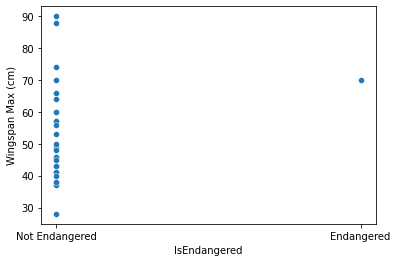

In [9]:
import seaborn as sns
from scipy.stats import ttest_ind

# Preparación del dataframe
df_birds["Conservation status"].replace({0: "Undefined"}, inplace=True)
df_birds.loc[(df_birds['Conservation status'] == 'LC') | (df_birds['Conservation status'] == 'NT'), 'IsEndangered'] = 'Not Endangered'  
df_birds.loc[(df_birds['Conservation status'] != 'LC') & (df_birds['Conservation status'] != 'NT') & (df_birds['Conservation status'] != 'Undefined'), 'IsEndangered'] = 'Endangered'

esco_peligro = df_birds[(df_birds['Family']=='Scolopacidae') & (df_birds['Conservation status'] != "LC") & (df_birds['Conservation status'] != "NT") & (df_birds['Conservation status'] != "0")]
esco_no_peligro = df_birds[(df_birds['Family']=='Scolopacidae') & (df_birds['Conservation status'] == "LC") | (df_birds['Conservation status'] == "NT")]

wingspan_esco_peligro = esco_peligro['Wingspan Max (cm)']
wingspan_esco_no_peligro = esco_no_peligro['Wingspan Max (cm)']

tscore, p = ttest_ind(wingspan_esco_peligro, wingspan_esco_no_peligro)
print('tscore=%.2f, p=%.2f' % (tscore, p))
if p > alpha:
    print('No se rechaza la hipótesis nula. Los escolopácidos en peligro de extinción no tienen una envergadura de ala máxima media mayor')
else:
    print('Se rechaza la hipótesis nula. Los escolopácidos en peligro de extinción tienen una envergadura de ala máxima media mayor')

df_birds_esco = df_birds[(df_birds['Family']=='Scolopacidae')]
sns.scatterplot(x='IsEndangered', y='Wingspan Max (cm)', data=df_birds_esco)